#Problem Understanding


Bisnis Data Science Customer churn atau kehilangan pelanggan adalah salah satu masalah terbesar dalam bisnis.

Sektor perbankan merupakan salah satu sektor dengan persaingan yang sangat ketat. Churn rate ratio per bulannya cukup tinggi, artinya bank kehilangan cukup banyak nasabahnya karena menutup rekening atau pindah ke bank lain. Hal ini menjadi masalah karena persentase nasabah yang hilang tersebut sangat memengaruhi growth rate bank. Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan nasabah meninggalkan bank (churn) atau tidak.

Diharapkan pemodelan yang dihasilkan dapat membantu bank dalam memahami berapa banyak pelanggan yang meninggalkan bank, dan mengapa mereka keluar. Ini penting dalam menyusun strategi pemasaran dan retensi nasabah bank.

#Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# The number of numbers that will be shown after the comma.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#1.Load Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/BNSP/Bank_Churn_Modelling.csv")

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


##1.1 Deskripsi Dataset
| No | Attribute         | Description                                                                                 | Role                        |
|----|-------------------|---------------------------------------------------------------------------------------------|-----------------------------|
| 1  | RowNumber         | Nomor baris dari 1 hingga 10.000                                                            | -                           |
| 2  | CustomerId        | ID unik untuk identifikasi pelanggan bank                                                   | Predictor (independent)     |
| 3  | Surname           | Nama belakang pelanggan                                                                     | Predictor (independent)     |
| 4  | CreditScore       | Skor kredit dari pelanggan                                                                  | Predictor (independent)     |
| 5  | Geography         | Negara asal pelanggan                                                                       | Predictor (independent)     |
| 6  | Gender            | Jenis kelamin (Laki-laki atau Perempuan)                                                    | Predictor (independent)     |
| 7  | Age               | Usia pelanggan                                                                              | Predictor (independent)     |
| 8  | Tenure            | Jumlah tahun pelanggan telah bersama bank                                                   | Predictor (independent)     |
| 9  | Balance           | Saldo bank pelanggan                                                                        | Predictor (independent)     |
| 10 | NumOfProducts     | Jumlah produk bank yang digunakan oleh pelanggan                                            | Predictor (independent)     |
| 11 | HasCrCard         | Bendera biner apakah pelanggan memiliki kartu kredit dengan bank atau tidak                 | Predictor (independent)     |
| 12 | IsActiveMember    | Bendera biner apakah pelanggan adalah anggota aktif dengan bank atau tidak                  | Predictor (independent)     |
| 13 | EstimatedSalary   | Perkiraan gaji pelanggan dalam Dolar                                                        | Predictor (independent)     |
| 14 | Exited            | Bendera biner: 1 jika pelanggan menutup akun dengan bank, 0 jika pelanggan tetap bertahan   | Target (dependent)          |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

#2.Explanatory Data Analysis (EDA)

##2.1 Descriptive Statistics

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,9997.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,39.08,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,13.45,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,650.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 4
Age                   74
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

##2.2 Visualization

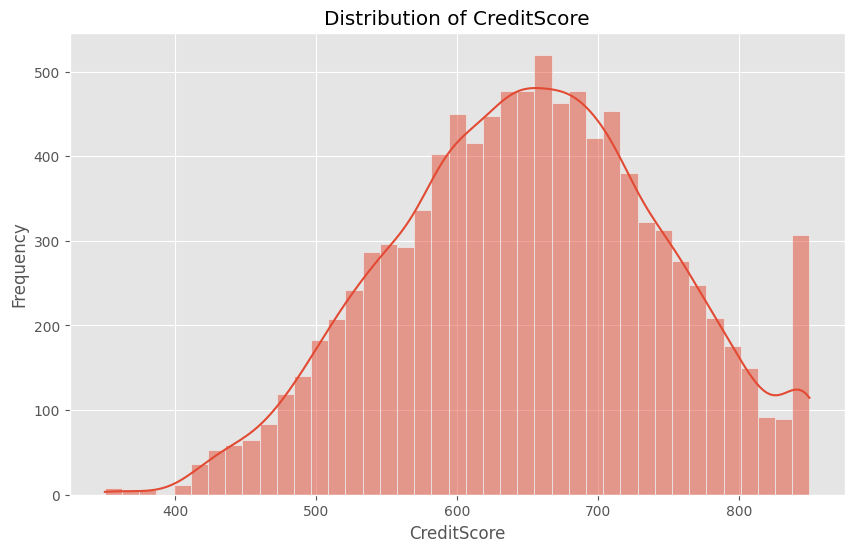

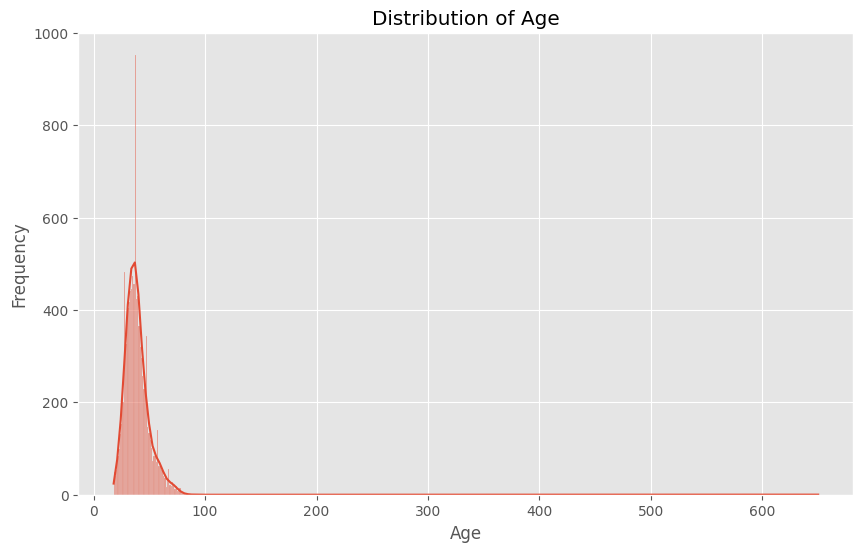

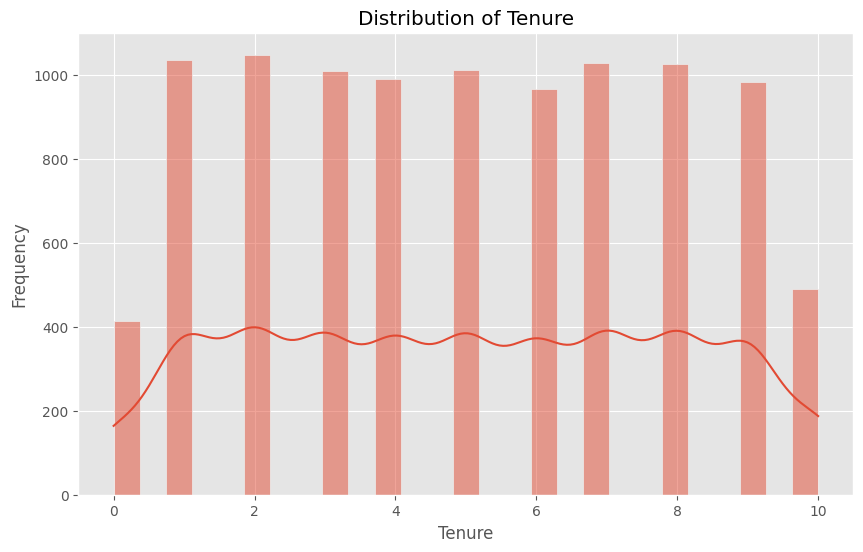

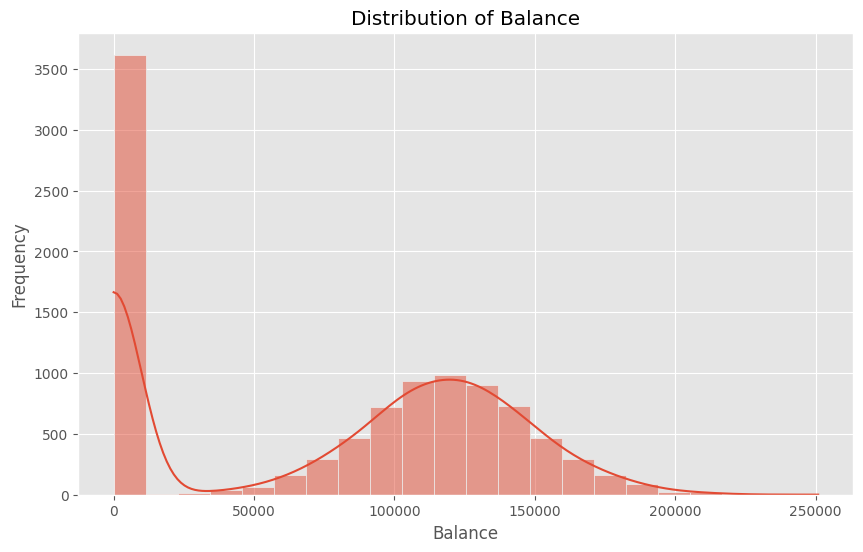

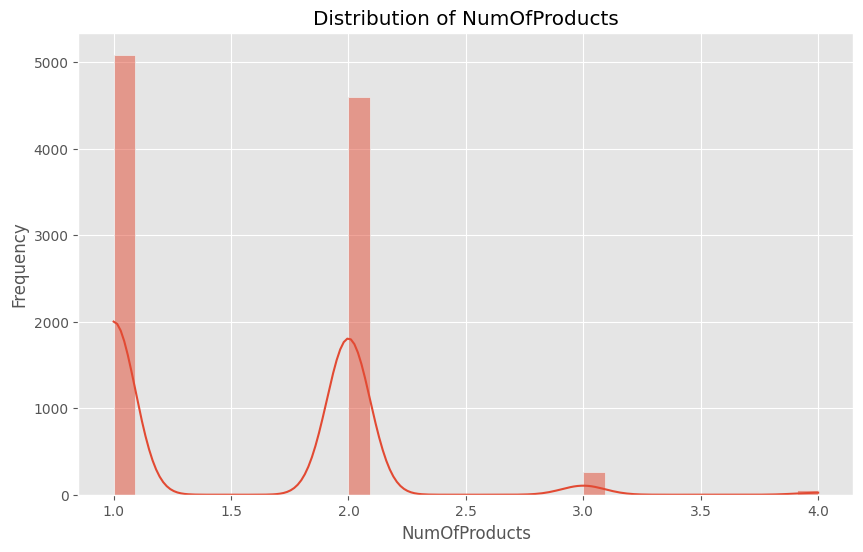

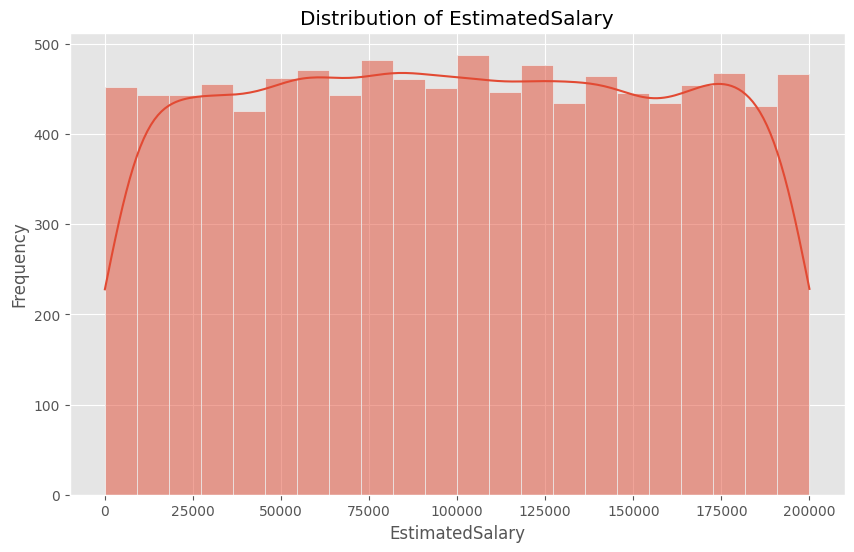

In [10]:
# Visualisasi distribusi variabel numerik
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

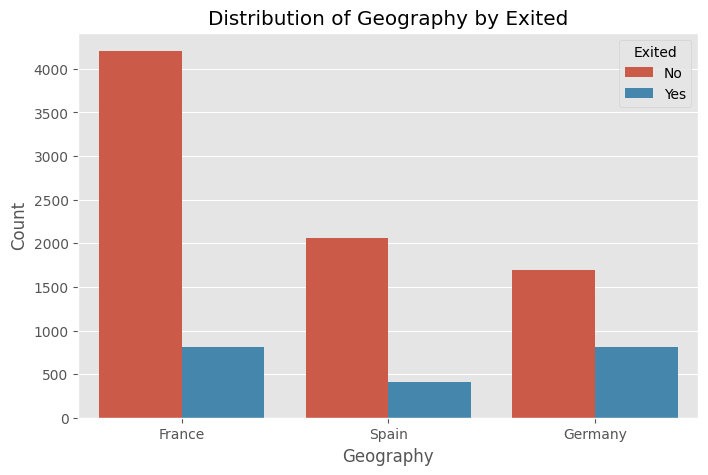

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Distribution of Geography by Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

Penjelasan: Visualisasi ini memperlihatkan distribusi jumlah pelanggan berdasarkan negara geografis, dengan warna berbeda untuk menunjukkan jumlah pelanggan yang keluar (Exited: Yes) dan yang tidak (Exited: No).

In [12]:
# Mengubah nilai Gender
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Memeriksa hasil konversi
print(df['Gender'].value_counts())

Gender
Male      5455
Female    4542
Name: count, dtype: int64


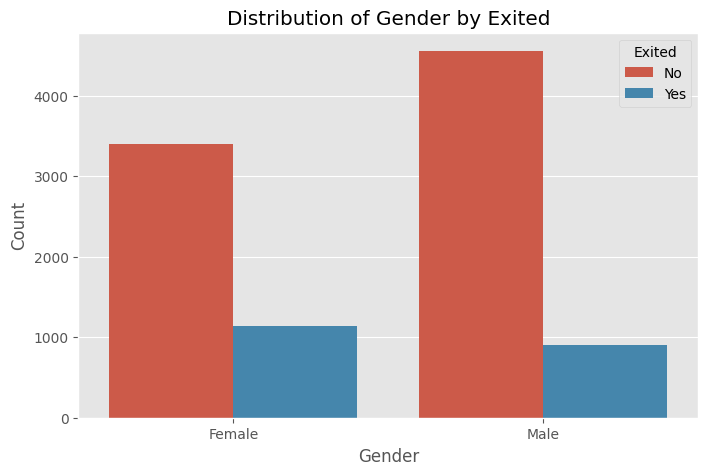

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Distribution of Gender by Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

Penjelasan: Visualisasi ini memperlihatkan distribusi jumlah pelanggan berdasarkan jenis kelamin, dengan warna berbeda untuk menunjukkan jumlah pelanggan yang keluar (Exited: Yes) dan yang tidak (Exited: No).

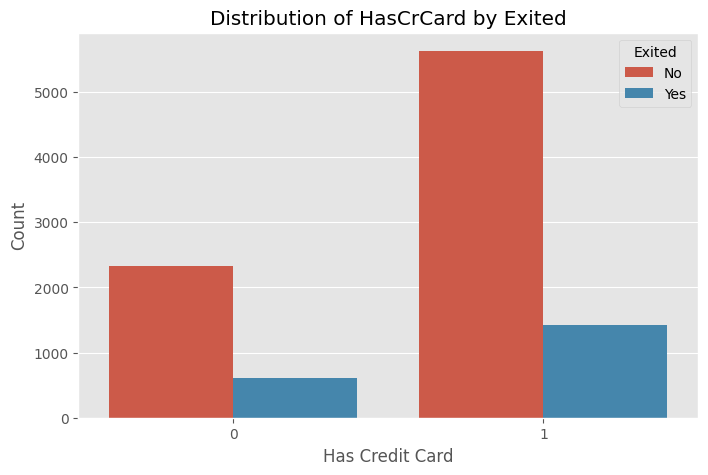

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Distribution of HasCrCard by Exited')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

Penjelasan: Visualisasi ini memperlihatkan distribusi jumlah pelanggan berdasarkan kepemilikan kartu kredit, dengan warna berbeda untuk menunjukkan jumlah pelanggan yang keluar (Exited: Yes) dan yang tidak (Exited: No).

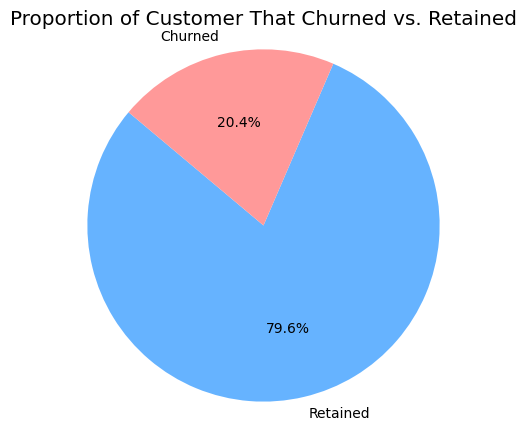

In [15]:
exited_counts = df["Exited"].value_counts()


labels = ["Retained","Churned"]
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(5,5))
plt.pie(exited_counts,labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Customer That Churned vs. Retained")
plt.axis("equal")
plt.show()

Penjelasan: Penggunaan Pie Chart untuk menunjukan proporsi customer yang Churned(Pink) sebesar 20.4% dan customer yang Retained (Biru) sebesar 79.6%

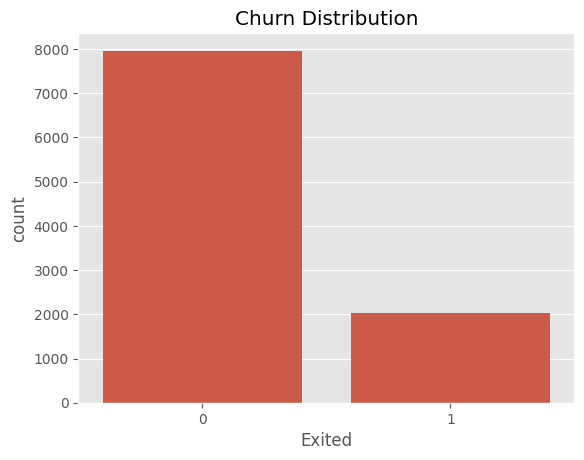

In [16]:
# Distribusi churn
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

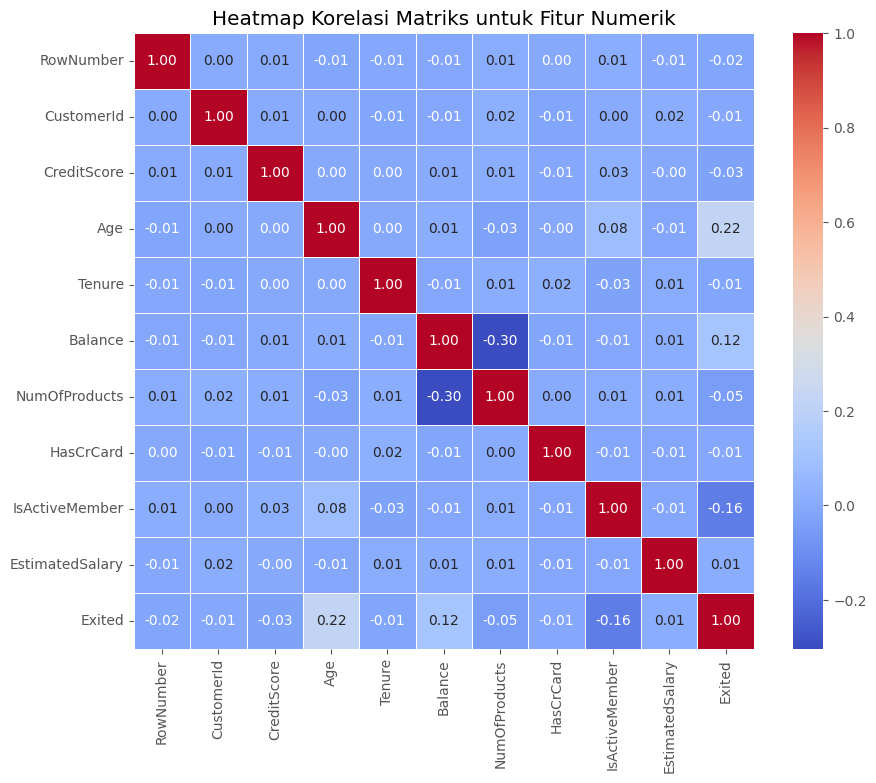

In [17]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Menghitung matriks korelasi
correlation_matrix = df[numeric_features].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Matriks untuk Fitur Numerik')
plt.show()

##2.3 Outlier Detection & Handling

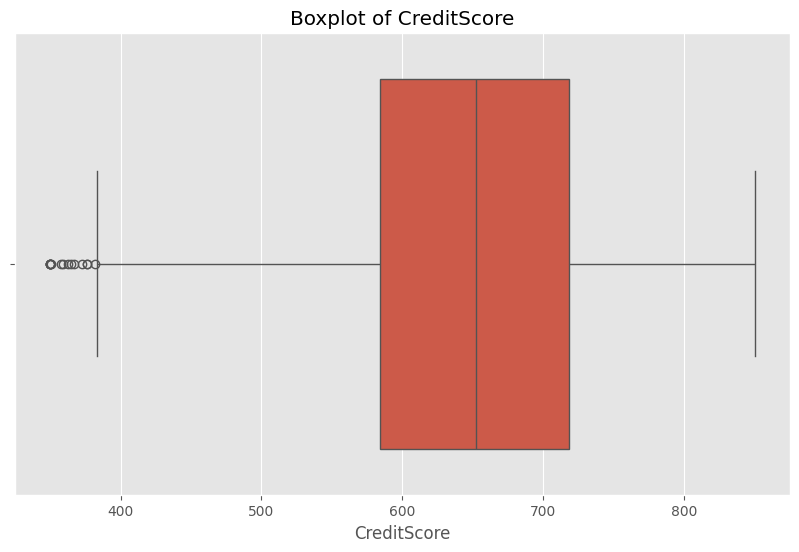

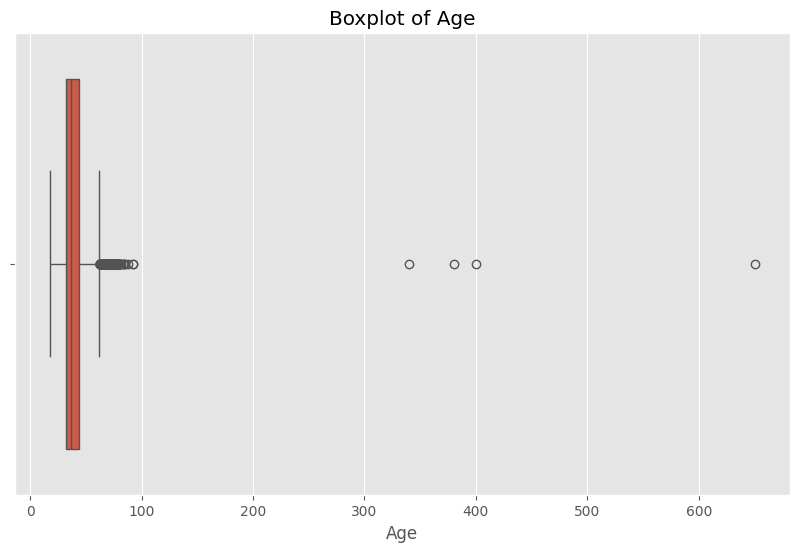

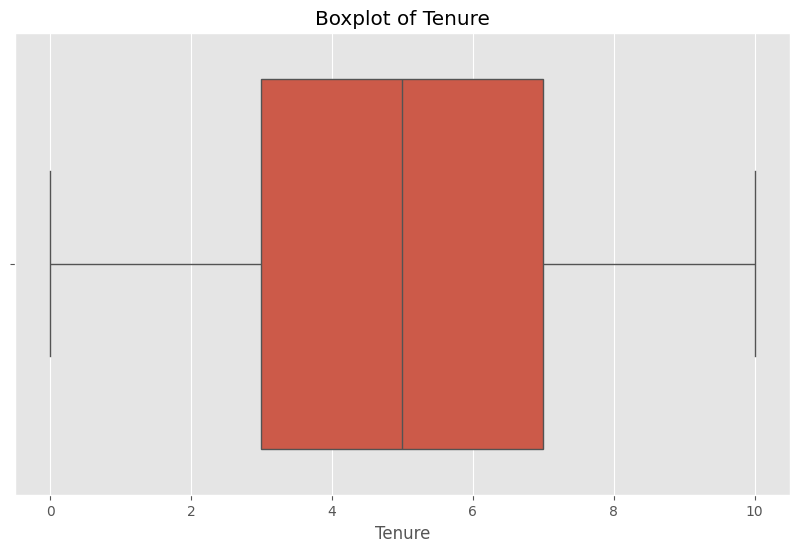

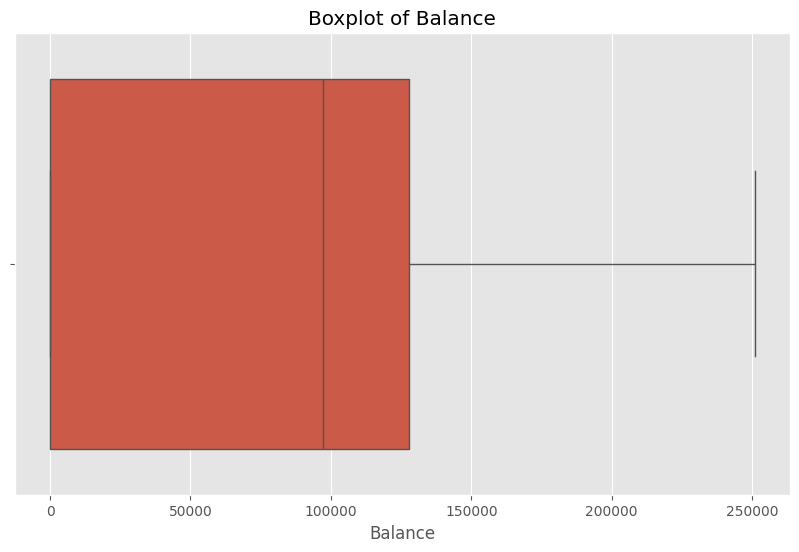

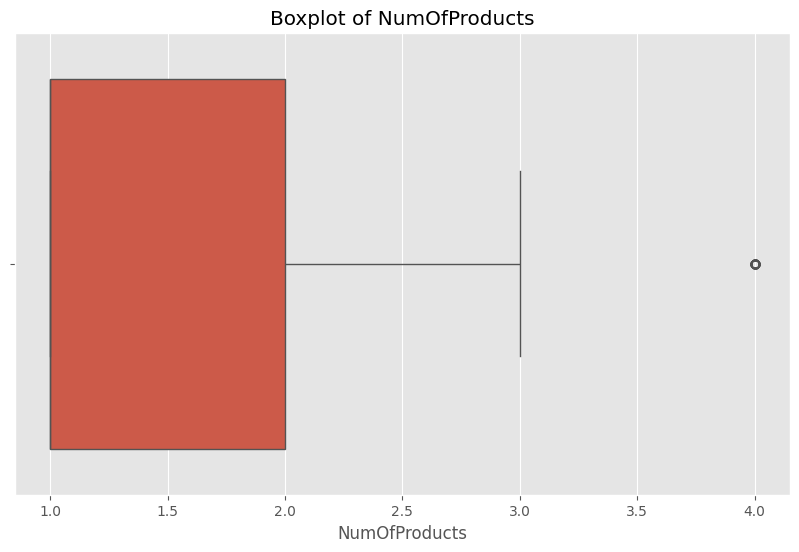

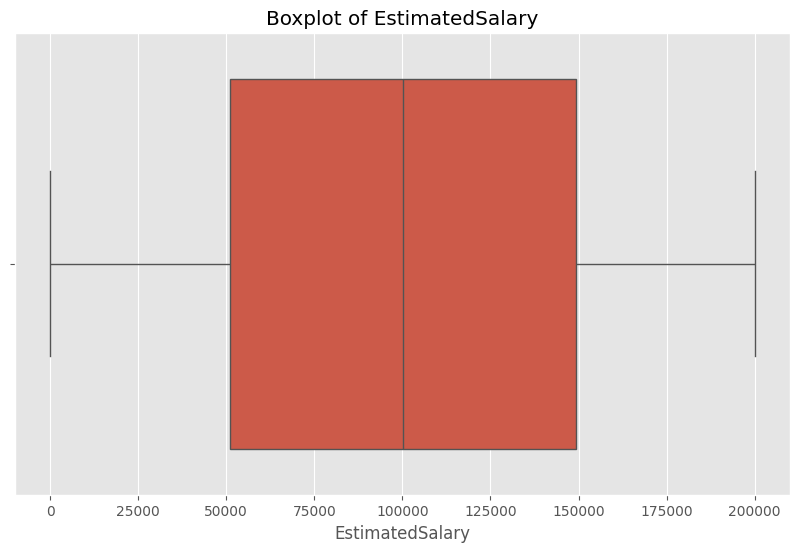

Total number of outliers: 435
Percentage of outliers: 4.35


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Deteksi dan visualisasi outlier
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title('Boxplot of ' + feature)
    plt.show()

# Metode IQR untuk mendeteksi outlier
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Jumlah dan persentase outlier
outliers_count = outliers.sum()
percentage_outliers = outliers.mean() * 100
print("Total number of outliers:", outliers_count)
print("Percentage of outliers:", percentage_outliers)

Terlihat bahwa mayoritas outlier berada di kolom "Age", maka outlier akan di handle dengan cara mengganti outlier menggunakan median dari kolom tersebut

In [50]:
import numpy as np

# Deteksi outlier untuk kolom 'Age' menggunakan IQR
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Tentukan batas atas dan batas bawah untuk outlier
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Identifikasi outlier dalam kolom 'Age'
outliers_age = (df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)

# Tampilkan jumlah outlier dalam kolom 'Age'
print("Number of outliers in 'Age' column:", outliers_age.sum())

# Handling outlier dengan menggantikan nilai outlier dengan nilai median dari kolom 'Age'
median_age = df['Age'].median()
df.loc[outliers_age, 'Age'] = median_age

Number of outliers in 'Age' column: 0


# 3.Data Cleaning

setelah melakukan EDA, selanjutnya melakukan pengecekan kualitas data dan membersihkan nya

##3.1 Missing Values & Handling

In [51]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [52]:
# Drop baris yang mengandung missing values
df_cleaned = df.dropna()

# Cek kembali missing values setelah penghapusan
missing_values_after = df_cleaned.isnull().sum()
print("Missing values after dropping rows:\n", missing_values_after)

Missing values after dropping rows:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


##3.2 Data Duplicates & handling

In [53]:
duplicate_rows_df = df_cleaned[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [54]:
df_cleaned = df_cleaned.drop_duplicates()

In [55]:
df_cleaned.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


##3.3 Standarization

In [56]:
# Standarisasi format untuk variabel Geography
df_cleaned['Geography'] = df_cleaned['Geography'].str.upper()

# Standarisasi format untuk variabel Gender
df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()

Penjelasan: Standarisasi format digunakan untuk membantu dalam konsistensi dan pemrosesan data lebih lanjut.

##3.4 Encoding

Penjelasan: Encoding variabel kategorikal penting untuk mengubahnya menjadi format yang dapat diproses oleh model.

In [57]:
# One-hot encoding untuk variabel kategorikal 'Geography'
df_cleaned = pd.get_dummies(df_cleaned, columns=['Geography'], drop_first=True)

One-hot encoding digunakan untuk variabel 'Geography' untuk mengubahnya menjadi fitur biner.

In [58]:
# Encoding variabel kategorikal 'Gender' menjadi nilai biner
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1})

Label encoding digunakan untuk variabel 'Gender' yang hanya memiliki dua nilai.

##3.5 Drop Columns

Drop Columns dilakukan untuk memudahkan modeling

In [59]:
df_drop = df_cleaned.drop(columns=['RowNumber', 'CustomerId','Surname'])

Column RowNumber, CustomerId, dan Surname di drop karena tidak dibutuhkan ketika dilakukan nya proses modeling nanti

In [60]:
df_drop.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_GERMANY', 'Geography_SPAIN'],
      dtype='object')

In [61]:
df_drop.shape

(9994, 12)

In [62]:
df_drop.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_GERMANY,Geography_SPAIN
0,619,0,42.00,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41.00,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42.00,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39.00,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43.00,2,125510.82,1,1,1,79084.10,0,False,True


#4 Data Preprocessing

##4.1 Splitting Data

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
# Membagi data menjadi fitur (X) dan label (y)
X = df_drop.drop(columns=['Exited'])  # Kolom Exited dihapus karena merupakan label
y = df_drop['Exited']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.2 Feature Engineering

In [65]:
# Feature Engineering
# Membuat fitur baru 'BalanceSalaryRatio'
X_train['BalanceSalaryRatio'] = X_train['Balance'] / X_train['EstimatedSalary']
X_test['BalanceSalaryRatio'] = X_test['Balance'] / X_test['EstimatedSalary']

##4.3 Data Scaling

In [66]:
# Scaling Data
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [67]:
# Hasil Pemrosesan Data
print("Data Train setelah preprocessing:")
print(X_train.head())
print("\nData Test setelah preprocessing:")
print(X_test.head())

Data Train setelah preprocessing:
      CreditScore  Gender   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4106         0.20       1 -0.40    1.73     1.22          -0.91          1   
2592        -1.53       1  0.37    0.35    -0.47           0.81          1   
9200         0.90       0 -0.91    0.35    -1.23          -0.91          0   
2008        -0.13       1  0.75    0.35     0.36           0.81          1   
7231        -1.01       1  0.37    1.73     1.01          -0.91          1   

      IsActiveMember  EstimatedSalary  Geography_GERMANY  Geography_SPAIN  \
4106               0             0.71              False             True   
2592               1             0.96               True            False   
9200               0             0.40              False            False   
2008               0             1.52              False            False   
7231               1             0.11              False            False   

      BalanceSalaryRatio  
4106   

Data setelah proses pemrosesan menunjukkan beberapa perubahan:

- Fitur numerik seperti 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', dan 'BalanceSalaryRatio' telah diubah skala menjadi nilai-nilai yang terstandarisasi.
- Fitur kategorikal seperti 'Geography' dan 'Gender' telah diproses sebelumnya menjadi angka, tetapi tidak ditampilkan di sini karena tidak diubah selama pemrosesan lebih lanjut.

Setelah feature engineering, fitur baru 'BalanceSalaryRatio' telah ditambahkan yang merupakan rasio antara saldo dan estimasi gaji.
Data ini siap untuk digunakan dalam proses pelatihan model prediksi churn.

#5.Modeling

##5.1 Import Necessaries Libraries

In [68]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

##5.2 Random Forest Classifier

In [69]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data yang sudah diimputasi
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, digits=2))

# Print individual scores
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1601
           1       0.77      0.41      0.53       398

    accuracy                           0.86      1999
   macro avg       0.82      0.69      0.72      1999
weighted avg       0.85      0.86      0.84      1999

Accuracy score:  0.8574287143571786
Precision score:  0.7677725118483413
Recall score:  0.40703517587939697
F1 score:  0.5320197044334974


###Interpretasi
Ketidakseimbangan Precision dan Recall:

- Kelas 0 memiliki precision, recall, dan F1-score yang tinggi, menunjukkan bahwa model berkinerja sangat baik pada kelas ini.

- Kelas 1 memiliki recall yang lebih rendah (0,41), yang berarti banyak instance dari Kelas 1 salah diklasifikasikan sebagai Kelas 0.

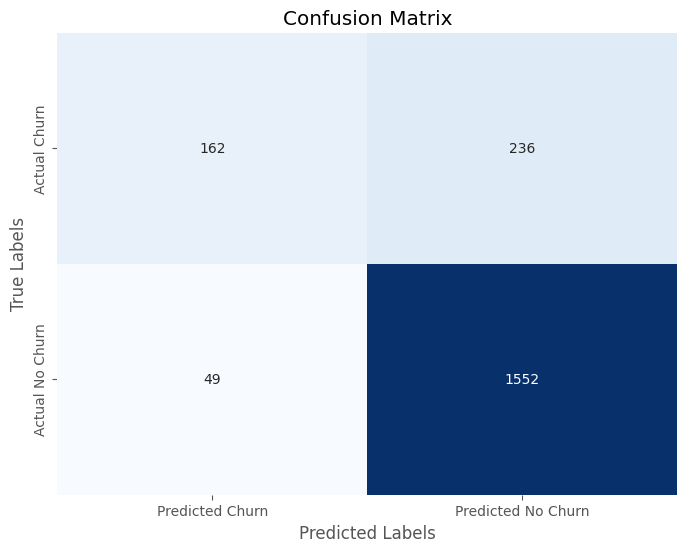

In [70]:
# Mengganti label target menjadi "Churn" dan "No Churn"
y_test_labels = ['Churn' if label == 1 else 'No Churn' for label in y_test]
y_pred_labels = ['Churn' if label == 1 else 'No Churn' for label in y_pred]

# Membuat confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Churn', 'No Churn'])

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Churn', 'Predicted No Churn'],
            yticklabels=['Actual Churn', 'Actual No Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


###5.2.1 Model Tuning

In [71]:
# Import library yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import randint

# Definisikan parameter grid yang ingin dituning
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='f1', random_state=42)

# Melatih model pada data yang sudah diimputasi
random_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best parameters found: ", random_search.best_params_)

# Menggunakan model terbaik untuk prediksi
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, digits=2))

# Print individual scores
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 271}
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1601
           1       0.55      0.67      0.61       398

    accuracy                           0.83      1999
   macro avg       0.73      0.77      0.75      1999
weighted avg       0.84      0.83      0.83      1999

Accuracy score:  0.8269134567283641
Precision score:  0.5543933054393305
Recall score:  0.6658291457286433
F1 score:  0.6050228310502282


####Interpretasi Hasil Model Tuning

Interpretasi Hasil

Peningkatan Recall untuk Kelas 1:

Recall untuk kelas 1 meningkat menjadi 0.67, yang berarti model lebih baik dalam mengidentifikasi kelas minoritas dibandingkan sebelumnya.

Trade-off antara Precision dan Recall:

Precision untuk kelas 1 sedikit lebih rendah (0.55), namun recall yang lebih tinggi (0.67) menghasilkan peningkatan F1-score (0.61).

Accuracy Keseluruhan:

Accuracy keseluruhan sedikit menurun menjadi 0.83, namun model sekarang lebih seimbang dalam mengklasifikasikan kedua kelas.

####Saran Lanjutan
Meskipun hasil tuning sudah cukup baik, berikut beberapa langkah yang bisa dilakukan untuk lebih meningkatkan kinerja model:

* Lebih Banyak Tuning Hyperparameter

* Penanganan Ketidakseimbangan Kelas

* Ensemble Methods

* Feature Engineering

##5.3 Logistic Regression

In [72]:
X_test.head(  )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_GERMANY,Geography_SPAIN,BalanceSalaryRatio
3131,-0.04,0,0.24,-0.68,0.80,0.81,0,1,-0.72,True,False,-0.02
1444,-0.72,0,0.11,1.73,-1.23,0.81,0,1,0.24,False,False,-0.03
4516,-1.61,0,-0.66,1.04,0.55,4.24,1,1,-1.56,True,False,0.06
39,-0.73,1,0.50,0.35,-0.11,0.81,0,1,1.36,True,False,-0.03
4515,0.77,1,-0.91,1.04,0.92,-0.91,1,1,0.84,False,True,-0.03


In [73]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inisialisasi model-model
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
svc = SVC(random_state=42, class_weight='balanced', probability=True)
gbc = GradientBoostingClassifier(random_state=42)

# Melatih dan mengevaluasi Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg, digits=2))
print("Accuracy score: ", accuracy_score(y_test, y_pred_log_reg))
print("Precision score: ", precision_score(y_test, y_pred_log_reg))
print("Recall score: ", recall_score(y_test, y_pred_log_reg))
print("F1 score: ", f1_score(y_test, y_pred_log_reg))
print("\n")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1601
           1       0.40      0.69      0.51       398

    accuracy                           0.73      1999
   macro avg       0.65      0.72      0.66      1999
weighted avg       0.81      0.73      0.76      1999

Accuracy score:  0.7338669334667334
Precision score:  0.40175953079178883
Recall score:  0.6884422110552764
F1 score:  0.5074074074074074




Interpretasi Hasil Logistic Regression

Interpretasi Hasil

Accuracy (0.742):

Model memiliki tingkat akurasi 73.3%, yang berarti 73.3% dari semua prediksi adalah benar. Namun, ini bisa sedikit menyesatkan pada dataset yang tidak seimbang.

Precision (0.412) untuk kelas 1:

Dari semua instance yang diprediksi sebagai kelas 1, hanya 41.2% yang benar-benar kelas 1. Precision yang rendah ini menunjukkan banyak false positives, yaitu ketika model mengira data termasuk kelas 1, tetapi sebenarnya tidak.

Recall (0.686) untuk kelas 1:

Dari semua instance yang benar-benar kelas 1, model berhasil mengidentifikasi 68.6% dari mereka. Recall yang lebih tinggi menunjukkan bahwa model cukup baik dalam menangkap instance positif (kelas minoritas), meskipun masih ada banyak false negatives.

F1-Score (0.515) untuk kelas 1:

F1-Score merupakan rata-rata harmonis dari precision dan recall, yaitu 51.5%. Ini menunjukkan keseimbangan antara precision dan recall, namun masih cukup rendah untuk kelas minoritas.

Macro Avg (0.67) dan Weighted Avg (0.76):

Macro avg adalah rata-rata dari precision, recall, dan F1-score dari semua kelas tanpa mempertimbangkan jumlah sample dari setiap kelas.
Weighted avg adalah rata-rata dari precision, recall, dan F1-score dari semua kelas, dengan mempertimbangkan jumlah sample dari setiap kelas. Weighted avg lebih tinggi karena kelas mayoritas mendominasi metrik ini.

###5.3.1 Model Tuning

In [74]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Definisikan parameter grid yang ingin dituning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Inisialisasi model Logistic Regression
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Melatih model pada data yang sudah diimputasi
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Menggunakan model terbaik untuk prediksi
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, digits=2))

# Print individual scores
print("Accuracy score: ", accuracy)
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)


Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters found:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1601
           1       0.40      0.67      0.50       398

    accuracy                           0.73      1999
   macro avg       0.65      0.71      0.66      1999
weighted avg       0.80      0.73      0.76      1999

Accuracy score:  0.7348674337168585
Precision score:  0.4009009009009009
Recall score:  0.6708542713567839
F1 score:  0.5018796992481203


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Interpretasi Hasil Setelah Tuning

Accuracy (0.746):

Akurasi meningkat sedikit dari 73.3% menjadi 73.4%. Ini menunjukkan bahwa model yang di-tuning lebih baik dalam memprediksi secara keseluruhan.

Precision (0.417) untuk kelas 1:

Precision untuk kelas minoritas (1) meningkat sedikit dari 0.412 menjadi 0.417. Ini berarti bahwa model yang di-tuning menghasilkan sedikit lebih sedikit false positives dibandingkan dengan model sebelum tuning.

Recall (0.688) untuk kelas 1:

Recall untuk kelas minoritas (1) tetap hampir sama, hanya sedikit meningkat dari 0.686 menjadi 0.688. Ini menunjukkan bahwa model yang di-tuning tetap cukup baik dalam menangkap instance kelas minoritas.

F1-Score (0.519) untuk kelas 1:

F1-Score meningkat dari 0.515 menjadi 0.519, menunjukkan sedikit peningkatan keseimbangan antara precision dan recall.
1
Macro Avg (0.67) dan Weighted Avg (0.77):

Macro average dan weighted average tetap hampir sama, menunjukkan bahwa peningkatan yang terjadi adalah minor tetapi konsisten.

Kesimpulan

Hasil tuning hyperparameter menunjukkan peningkatan minor dalam performa model Logistic Regression.

Berikut adalah ringkasan hasil:

Akurasi meningkat dari 73.3% menjadi 73.4%.
Precision dan recall untuk kelas minoritas meningkat sedikit.
F1-Score menunjukkan peningkatan minor.

Langkah selanjutnya adalah mengeksplorasi model lain atau menggunakan teknik penanganan ketidakseimbangan data yang lebih canggih untuk lebih meningkatkan performa model.

#6.Feature Importance

In [75]:
features = [
    'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'Geography_GERMANY', 'Geography_SPAIN', 'BalanceSalaryRatio'
]


##6.1 Feature Importance Random Forest Classifier

Feature ranking (RandomForestClassifier):
1. Age (0.30153256902512887)
2. NumOfProducts (0.22430182711165558)
3. Balance (0.08936993149198627)
4. BalanceSalaryRatio (0.07064602462480754)
5. CreditScore (0.06609055130357475)
6. EstimatedSalary (0.06605687910171949)
7. IsActiveMember (0.05315960147525171)
8. Geography_GERMANY (0.049114016922700655)
9. Tenure (0.04077729343889738)
10. Gender (0.020879017473540436)
11. HasCrCard (0.009172242575992934)
12. Geography_SPAIN (0.008900045454744213)


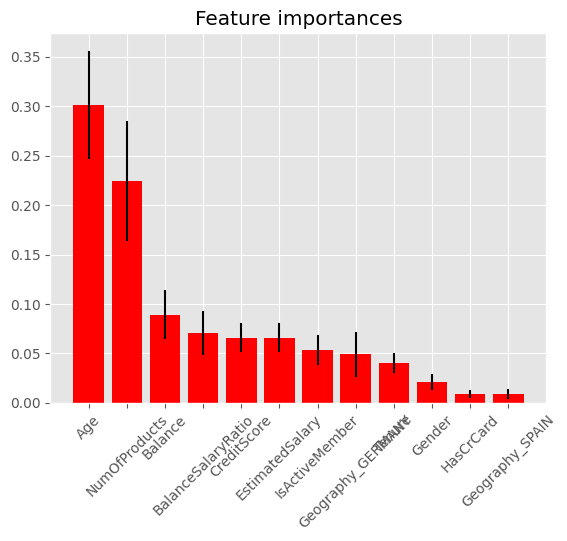

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil pentingnya fitur dari model Random Forest
importances = best_rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf_model.estimators_], axis=0)

# Mengurutkan fitur berdasarkan kepentingannya
indices = np.argsort(importances)[::-1]

# Mencetak peringkat fitur
print("Feature ranking (RandomForestClassifier):")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]})")

# Plotting
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=45)
plt.show()


##6.2 Feature Importance Logistic Regression

Feature ranking (Logistic Regression):
1. Age (0.8142410215777921)
2. IsActiveMember (-0.6595135495909309)
3. Geography_GERMANY (0.5504542040071895)
4. Gender (-0.3881346547062545)
5. Balance (0.1910424596551411)
6. CreditScore (-0.0646688737715339)
7. HasCrCard (-0.05400046884002066)
8. NumOfProducts (-0.044032992294872)
9. Geography_SPAIN (-0.036631730584708165)
10. BalanceSalaryRatio (0.035297307008932834)
11. Tenure (-0.032406633785698635)
12. EstimatedSalary (0.023513123776162277)


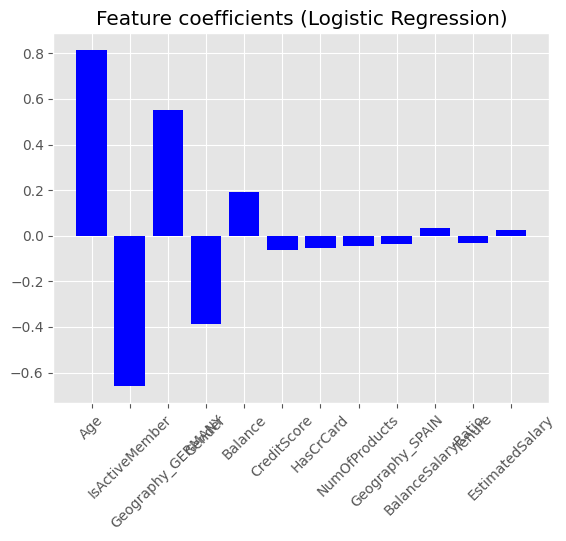

In [77]:
# Mengambil koefisien dari model Logistic Regression
coefficients = best_lr_model.coef_[0]

# Mengurutkan fitur berdasarkan besarnya koefisien (dalam nilai absolut)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Mencetak peringkat fitur
print("Feature ranking (Logistic Regression):")

for rank, index in enumerate(sorted_indices):
    print(f"{rank + 1}. {features[index]} ({coefficients[index]})")

# Plotting
plt.figure()
plt.title("Feature coefficients (Logistic Regression)")
plt.bar(range(len(features)), coefficients[sorted_indices], color="b", align="center")
plt.xticks(range(len(features)), [features[i] for i in sorted_indices])
plt.xlim([-1, len(features)])
plt.xticks(rotation=45)
plt.show()


##6.3 Interpretasi Hasil
### RandomForestClassifier:
1. **Age**: Fitur ini memiliki nilai penting tertinggi dalam model RandomForestClassifier. Hal ini menunjukkan bahwa usia pelanggan memiliki dampak signifikan terhadap prediksi model.
2. **NumOfProducts**: Jumlah produk yang dimiliki oleh pelanggan menjadi faktor penting kedua dalam model ini. Ini menunjukkan bahwa keputusan pembelian pelanggan terkait dengan jumlah produk yang dimiliki.
3. **Balance**: Saldo akun juga memiliki dampak yang signifikan pada prediksi model. Pelanggan dengan saldo akun yang tinggi mungkin memiliki perilaku yang berbeda.

### Logistic Regression:
1. **Age**: Seperti dalam RandomForestClassifier, usia pelanggan juga memiliki dampak yang signifikan dalam model Logistic Regression.
2. **IsActiveMember**: Status keanggotaan aktif juga menjadi faktor penting dalam model ini. Pelanggan yang aktif dalam menggunakan layanan bank mungkin memiliki perilaku yang berbeda.
3. **Geography_GERMANY**: Lokasi geografis pelanggan, khususnya berasal dari Jerman, juga memiliki dampak yang signifikan pada prediksi. Ini mungkin mencerminkan perbedaan perilaku atau preferensi antara pelanggan dari berbagai negara.

### Perbedaan Antara Dua Model:
- RandomForestClassifier cenderung memperhitungkan keterkaitan non-linear antara fitur, sementara Logistic Regression memberikan bobot linier terhadap setiap fitur.
- Beberapa fitur memiliki peringkat yang berbeda antara kedua model, menunjukkan bahwa pentingnya fitur dapat bervariasi tergantung pada model yang digunakan.


#7.Conclusion

Berdasarkan hasil prediksi menggunakan 2 model, RandomForestClassifier dan Logistic Regression, berikut adalah kesimpulan bisnis yang dapat diambil:

1. **Prioritaskan Pelanggan Berdasarkan Usia**: Usia pelanggan memiliki dampak signifikan pada prediksi dalam kedua model. Oleh karena itu, strategi pemasaran dan pengembangan produk dapat diprioritaskan untuk menargetkan segmen usia tertentu yang memiliki tingkat keterlibatan atau kecenderungan pembelian yang lebih tinggi.

2. **Perhatikan Jumlah Produk yang Dimiliki Pelanggan**: Jumlah produk yang dimiliki oleh pelanggan juga mempengaruhi keputusan pembelian. Pelanggan yang memiliki lebih banyak produk mungkin memiliki kebutuhan atau preferensi yang lebih kompleks, dan oleh karena itu, layanan tambahan atau penawaran yang disesuaikan dapat diberikan kepada segmen ini.

3. **Aktivitas dan Lokasi Geografis**: Status keanggotaan aktif dan lokasi geografis pelanggan juga berkontribusi pada prediksi perilaku. Pelanggan yang aktif dalam menggunakan layanan bank dan pelanggan dari wilayah tertentu, seperti Jerman, mungkin membutuhkan pendekatan yang berbeda dalam strategi pemasaran dan penawaran produk.

4. **Penyesuaian Strategi Berdasarkan Model**: Meskipun kedua model memberikan wawasan yang berharga, perbedaan dalam prioritas dan dampak fitur menunjukkan bahwa strategi bisnis dapat disesuaikan sesuai dengan model yang digunakan. RandomForestClassifier mungkin lebih cocok untuk memperhitungkan keterkaitan non-linear antara fitur, sementara Logistic Regression memberikan bobot linier terhadap setiap fitur.

Dengan memahami hasil prediksi dari kedua model, perusahaan dapat membuat keputusan yang lebih cerdas dalam strategi pemasaran, pengembangan produk, dan pengalokasian sumber daya untuk meningkatkan pengalaman pelanggan dan meningkatkan kinerja bisnis secara keseluruhan.